In [312]:
%load_ext autoreload
%autoreload 2
# load general packages
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import MODEL
from MODEL import TheModel
import time
import tools

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [313]:
model = TheModel()
par   = model.par
sol   = model.sol

In [ ]:
import math
def gauss_hermite(n):
    # a. calculations
    i = np.arange(1,n)
    a = np.sqrt(i/2)
    CM = np.diag(a,1) + np.diag(a,-1)
    L,V = np.linalg.eig(CM)
    I = L.argsort()
    V = V[:,I].T
    # b. nodes and weights
    x = L[I]
    w = np.sqrt(math.pi)*V[:,0]**2

    return x,w
def GaussHermite_lognorm(sigma,n):
    x, w = gauss_hermite(n)
    x = np.exp(x*math.sqrt(2)*sigma - 0.5*sigma**2)
    w = w / math.sqrt(math.pi)
    # assert a mean of one
    assert(1 - np.sum(w*x) < 1e-8 ), 'The mean in GH-lognorm is not 1'
    return x, w
par.sigma_xi = 0.1
par.Nxi= 4

par.xi,par.xi_w = GaussHermite_lognorm(par.sigma_xi,par.Nxi)

In [324]:
print(par.xi)
type(par.xi)

[0.78785484 0.92385848 1.07164664 1.25663991]


numpy.ndarray

In [332]:
   def create_grids(self):

        par = self.par
        # Check parameters
        assert (par.rho >= 0), 'not rho > 0'
        # need more checks?

        # Shocks for wage, this gives us the shock and weight!
        par.xi,par.xi_w = GaussHermite_lognorm(par.sigma_xi,par.Nxi)
        
        # Setting up grids 
        # We set up a grid for A, which is the exogeneously fixed monotonic grid over savings
        # End pf period assets
        par.grid_a = np.nan + np.zeros([par.T,par.Na])
        for t in range(par.T):
            par.grid_a[t,:] = tools.nonlinspace(0+1e-8,par.a_max,par.Na,par.a_phi)
        
        # We need a grid for human capital (K)
        par.grid_k =  tools.nonlinspace(0+1e-4,par.k_max,par.Nk,par.k_phi)
        #par.grid_k = np.nan + np.zeros([par.T,par.Nk])
        #for t in range(par.T):
        #    par.grid_k[t,:] = tools.nonlinspace(0+1e-8,par.k_max,par.Nk,par.k_phi)
        
        #Grid for m?
        #par.grid_m = np.nan + np.zeros([par.T,par.Nm])
        #for t in range(par.T):
        #    par.grid_m[t,:] = tools.nonlinspace(0+1e-8,par.m_max,par.Nm,par.m_phi)
        par.grid_m =  np.concatenate([np.linspace(0+1e-6,1-1e-6,par.Nm_b), tools.nonlinspace(1+1e-6,par.m_max,par.Nm-par.Nm_b,par.m_phi)])
        #par.grid_m =  tools.nonlinspace(0+1e-4,par.m_max,par.Nm,par.m_phi)
        # Set seed
        np.random.seed(2021)

In [334]:
print(par.grid_a)
type(par.grid_a)

print(par.grid_k)
print(par.grid_m)

[[1.00000000e-08 4.06906957e-01 8.15171190e-01 ... 9.59767132e+01
  9.78536428e+01 1.00000000e+02]
 [1.00000000e-08 4.06906957e-01 8.15171190e-01 ... 9.59767132e+01
  9.78536428e+01 1.00000000e+02]
 [1.00000000e-08 4.06906957e-01 8.15171190e-01 ... 9.59767132e+01
  9.78536428e+01 1.00000000e+02]
 ...
 [1.00000000e-08 4.06906957e-01 8.15171190e-01 ... 9.59767132e+01
  9.78536428e+01 1.00000000e+02]
 [1.00000000e-08 4.06906957e-01 8.15171190e-01 ... 9.59767132e+01
  9.78536428e+01 1.00000000e+02]
 [1.00000000e-08 4.06906957e-01 8.15171190e-01 ... 9.59767132e+01
  9.78536428e+01 1.00000000e+02]]
[1.00000000e-04 2.44243761e-01 4.89201893e-01 7.34981987e-01
 9.81591758e-01 1.22903904e+00 1.47733180e+00 1.72647812e+00
 1.97648622e+00 2.22736447e+00 2.47912134e+00 2.73176548e+00
 2.98530567e+00 3.23975082e+00 3.49511001e+00 3.75139247e+00
 4.00860759e+00 4.26676492e+00 4.52587418e+00 4.78594525e+00
 5.04698819e+00 5.30901324e+00 5.57203083e+00 5.83605157e+00
 6.10108625e+00 6.36714589e+00 6.6

In [337]:
print(par.grid_k)
i_k =7
print(par.grid_k[i_k])

[1.00000000e-04 2.44243761e-01 4.89201893e-01 7.34981987e-01
 9.81591758e-01 1.22903904e+00 1.47733180e+00 1.72647812e+00
 1.97648622e+00 2.22736447e+00 2.47912134e+00 2.73176548e+00
 2.98530567e+00 3.23975082e+00 3.49511001e+00 3.75139247e+00
 4.00860759e+00 4.26676492e+00 4.52587418e+00 4.78594525e+00
 5.04698819e+00 5.30901324e+00 5.57203083e+00 5.83605157e+00
 6.10108625e+00 6.36714589e+00 6.63424169e+00 6.90238506e+00
 7.17158763e+00 7.44186125e+00 7.71321798e+00 7.98567014e+00
 8.25923027e+00 8.53391116e+00 8.80972584e+00 9.08668761e+00
 9.36481004e+00 9.64410697e+00 9.92459251e+00 1.02062811e+01
 1.04891874e+01 1.07733264e+01 1.10587135e+01 1.13453644e+01
 1.16332949e+01 1.19225216e+01 1.22130609e+01 1.25049301e+01
 1.27981466e+01 1.30927281e+01 1.33886930e+01 1.36860599e+01
 1.39848478e+01 1.42850763e+01 1.45867654e+01 1.48899356e+01
 1.51946078e+01 1.55008035e+01 1.58085446e+01 1.61178538e+01
 1.64287540e+01 1.67412691e+01 1.70554233e+01 1.73712415e+01
 1.76887493e+01 1.800797

In [353]:
def solve(self):
        # Initialize
        par = self.par
        sol = self.sol

        shape=(par.T,par.Na,par.Nk,3,par.Nxi)
        sol.m = np.nan+np.zeros(shape)
        sol.c = np.nan+np.zeros(shape)
        sol.v = np.nan+np.zeros(shape)
        
        #Last period, consume all
        #for h in range(3):
        #    sol.m[par.T-1,h,:] = par.grid_m
        #    sol.c[par.T-1,h,:] = par.grid_m
        #    sol.v[par.T-1,h,:] = DCEGM.util(sol.c[par.T-1,h,:],h,par)

        # In our last period the agent will consume all!
        # Last period, (= consume all) 
        for i_a in range(par.Na):
            for i_k in range(par.Nk):
                for i_h in range(3):
                    #Her forsøg uden P og S!
                    #m = par.grid_a[i_a] * (1+par.r)  + par.h[i_h] * par.kappa * par.grid_k[i_k] * par.xi + par.P + par.rho*par.grid_k[i_k]
                    m = par.grid_a[i_a] * (1+par.r)  + par.h[i_h] * par.kappa * par.grid_k[i_k]*par.xi + par.P + par.rho*par.grid_k[i_k]
                    sol.m[par.T-1,i_a,i_k,par.h[i_h]] = m
                    sol.c[par.T-1,i_a,i_k,par.h[i_h]] = m
                    sol.v[par.T-1,i_a,i_k,par.h[i_h]] = DCEGM.util(sol.c[par.T-1,par.h[i_h],:],par.h[i_h],par)
                #sol.m[par.T-1,i_m,h] = par.grid_m[i_m,:]
                #sol.c[par.T-1,i_a,i_k,h] = par.grid_m[i_m,:]
                #sol.v[par.T-1,i_a,i_k,h] = egm.util(sol.c[par.T-1,i_m,h],h,par) 
                #SOLVE USING EGM:
                #[c, v, m] = model.EGM(par.T-1,h,k,par)   
                #sol.m[par.T-1,i_a,i_k,i_h] = m
                #sol.c[par.T-1,i_a,i_k,i_h] = c
                #sol.v[par.T-1,i_a,i_k,i_h] = v
                #=egm.util(sol.c[par.T-1,i_a,i_k,i_h],i_h,par)

[autoreload of MODEL failed: Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 245, in check
    superreload(m, reload, self.old_objects)
  File "/opt/anaconda3/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 450, in superreload
    update_generic(old_obj, new_obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 387, in update_generic
    update(a, b)
  File "/opt/anaconda3/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 357, in update_class
    update_instances(old, new)
  File "/opt/anaconda3/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 312, in update_instances
    update_instances(old, new, obj.__dict__, visited)
  File "/opt/anaconda3/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 312, in update_instances
    update_instances(old, new, obj.__dict__, visited)
  File "/opt/anaconda3/l

In [400]:
model = TheModel()
par   = model.par
sol   = model.sol

In [427]:
%load_ext autoreload
%autoreload 2
model = TheModel()
t0 = time.time()  # set the starting time
model.setup()
#tools.GaussHermite_lognorm(par.sigma_epsilon,par.Nxi)
model.create_grids()
model.solve()
par   = model.par
sol   = model.sol
t1 = time.time() # set the ending time
print(f'time: {t1-t0:.8} seconds') # print the total time
#print(f'{sol.m_logsum:.2}')
#print(sol.m_logsum[par.T-1,0,0])

#sol.m[par.T-1,i_a,i_k,i_h] = m
 #                   sol.c[par.T-1,i_a,i_k,i_h] = m
 #                   sol.v[par.T-1,i_a,i_k,i_h]

print(par.xi)
print(sol.m[par.T-1,8,2,2])
print(sol.m[par.T-1,0,0,2])
print(sol.v[par.T-1,2,2,2])


[autoreload of MODEL failed: Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 245, in check
    superreload(m, reload, self.old_objects)
  File "/opt/anaconda3/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 450, in superreload
    update_generic(old_obj, new_obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 387, in update_generic
    update(a, b)
  File "/opt/anaconda3/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 357, in update_class
    update_instances(old, new)
  File "/opt/anaconda3/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 312, in update_instances
    update_instances(old, new, obj.__dict__, visited)
  File "/opt/anaconda3/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 312, in update_instances
    update_instances(old, new, obj.__dict__, visited)
  File "/opt/anaconda3/l

KeyboardInterrupt: 

In [366]:
#print(f'{par.grid_m}')
for h in range(3):
    print(f'h range: {h} (if 0:0, 1:1/2 and 2:1)')
    print(f'c: {sol.c[par.T-1,h,:]}')
    print(f'v: {sol.v[par.T-1,h,:]}')

h range: 0 (if 0:0, 1:1/2 and 2:1)
c: [[[ 1.00001001  1.00001001  1.00001001  1.00001001]
  [ 1.00001395  1.00001463  1.00001537  1.00001629]
  [ 1.00001789  1.00001925  1.00002073  1.00002258]]

 [[ 1.02442439  1.02442439  1.02442439  1.02442439]
  [ 1.03404582  1.03570672  1.03751154  1.03977071]
  [ 1.04366725  1.04698905  1.05059869  1.05511703]]

 [[ 1.0489202   1.0489202   1.0489202   1.0489202 ]
  [ 1.0681912   1.07151787  1.07513278  1.07965773]
  [ 1.08746221  1.09411553  1.10134536  1.11039526]]

 ...

 [[ 6.7586032   6.7586032   6.7586032   6.7586032 ]
  [ 9.0270749   9.4186704   9.84419708 10.37684851]
  [11.29554659 12.0787376  12.92979095 13.99509381]]

 [[ 6.8712188   6.8712188   6.8712188   6.8712188 ]
  [ 9.18405286  9.58330643 10.01715473 10.56022272]
  [11.49688692 12.29539406 13.16309066 14.24922665]]

 [[ 7.00000001  7.00000001  7.00000001  7.00000001]
  [ 9.36356452  9.77157545 10.21493992 10.76991974]
  [11.72712904 12.54315089 13.42987983 14.53983948]]]
v: [[[ 1

In [382]:
i_h=1
def figure_gridM(m,c):
    fig = plt.figure(figsize=(8,5))
    ax = fig.add_subplot(1,1,1)
    ax.scatter(m,c)
    plt.legend()
    plt.show()

figure_gridM(m,sol.c[par.T-1,i_a,i_k,i_h])

[autoreload of MODEL failed: Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 245, in check
    superreload(m, reload, self.old_objects)
  File "/opt/anaconda3/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 450, in superreload
    update_generic(old_obj, new_obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 387, in update_generic
    update(a, b)
  File "/opt/anaconda3/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 357, in update_class
    update_instances(old, new)
  File "/opt/anaconda3/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 312, in update_instances
    update_instances(old, new, obj.__dict__, visited)
  File "/opt/anaconda3/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 312, in update_instances
    update_instances(old, new, obj.__dict__, visited)
  File "/opt/anaconda3/l

NameError: name 'm' is not defined

No handles with labels found to put in legend.


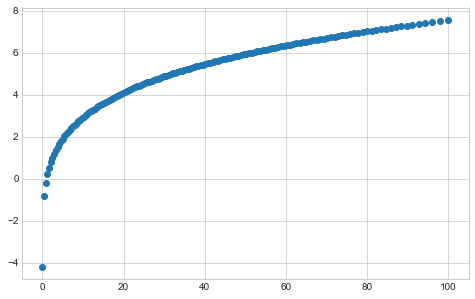

No handles with labels found to put in legend.


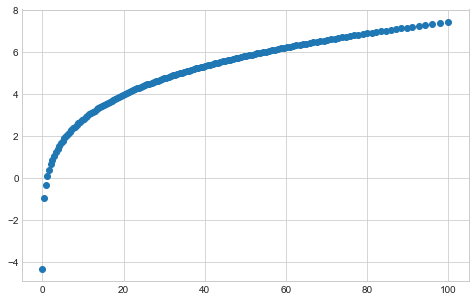

No handles with labels found to put in legend.


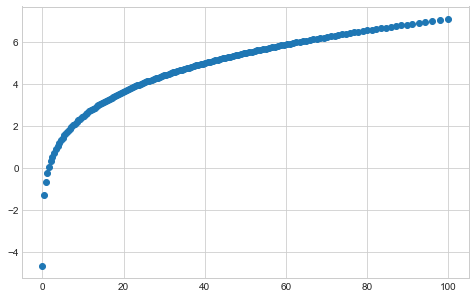

In [120]:
#Figur til check for sidste periode!
def figure_gridM(m,v):
    fig = plt.figure(figsize=(8,5))
    ax = fig.add_subplot(1,1,1)
    ax.scatter(m,v)
    plt.legend()
    plt.show()
h=0
figure_gridM(par.grid_m,sol.v[par.T-1,h,:])
h=1
figure_gridM(par.grid_m,sol.v[par.T-1,h,:])
h=2
figure_gridM(par.grid_m,sol.v[par.T-1,h,:])

In [208]:
# Figure
def figure_multi_dim(par,sol,h):
    if h == 0:
        print(f'h=0')
        ts = [par.T, par.T-1, par.T-2, par.T-3, par.T-4]
    elif h ==1:
        print(f'h=1/2')
        ts = [par.T, par.T-1, par.T-2, par.T-3, par.T-4]
    else:
        print(f'h=1')
        ts = [par.T, par.T-1, par.T-2, par.T-3, par.T-4]
    fig = plt.figure(figsize=(8,5))
    ax = fig.add_subplot(1,1,1)
    for i in ts:
        ax.scatter(par.grid_m,sol.c[i-1,z,:,i_p], label=f't = {i}')
    ax.set_xlabel(f"$m_t$")
    ax.set_ylabel(f"$c(m_t,z_{{t+1}} = {z}, p = {p:.3})$")
    ax.set_xlim([0, 5])
    ax.set_ylim([0,3])
    ax.set_title(f'Consumption function')
    plt.legend()
    plt.show()

figure_multi_dim(model.par,model.sol,1)
figure_multi_dim(model.par,model.sol,2)
figure_multi_dim(model.par,model.sol,3)

h=1/2


NameError: name 'z' is not defined